<a href="https://colab.research.google.com/github/PaulaDiz/QUANTUM_COMPUTING/blob/main/HW_05_Grover_Algorithm_SOLVED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFVQC2025 06 Lab - Grover Application

### Objective
In this notebook we are going to create a grover oracle for logical problems, which can be easily scaled to really complicated problems.


- 1. Implementing the Sudoku solver
- 2. Implementing the party problem - HOMEWORK

## 1. Implementing the Sudoku solver

Let's state our problem again:
We have a 2 by 2 sudoku and we want to get the possible answers using a quantum computer.
In order to do so, we need to implement the function which checks the answers, and has the following conditions:

    - S00 and S01 are different
    - S10 and S11 are different
    - S00 and S10 are different
    - S01 and S11 are different

We can use each of the ancillas to do the intermediate checks, and then give an output in the output_q

### 1.0 Prepare the circuit

In [2]:
!pip install qiskit qiskit-ibm-runtime qiskit[visualization]

import qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=bf3b92cf89bfca0a946b1e92d53eab500e0061415ab9e2fafcdc07503c355d49
  Stored in d

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

input_q = QuantumRegister(4, name="Input q")
ancilla_q = QuantumRegister(4, name="Ancilla q")
output_q = QuantumRegister(1, name="Output q")

output_bits = ClassicalRegister(4, name="Measurement")

sudoku_qc = QuantumCircuit(input_q, ancilla_q, output_q, output_bits)

### 1.2 Create a superposition state

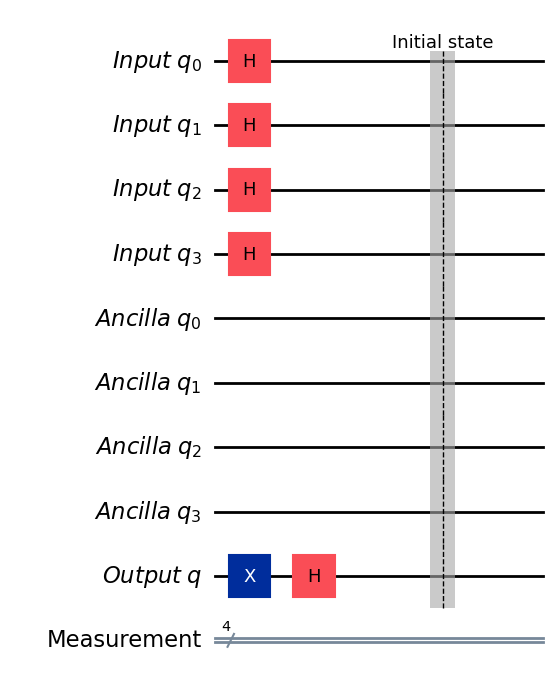

In [ ]:
# Input superposition
sudoku_qc.h(input_q)

# Output prepared for Phase Kickback
sudoku_qc.x(output_q)
sudoku_qc.h(output_q)
sudoku_qc.barrier(label="Initial state")

sudoku_qc.draw('mpl')

### 1.3 Implement the checking function

In [ ]:
# Now, we are required to implement a function that will check if our input is valid, and save it to the Output qubit
# For that, we will check pairs of cells to see if they are different (which they should be)

# Let's do it one by one

In [ ]:
# Check that q0 and q1 are different
sudoku_qc.cx(input_q[0], ancilla_q[0])
sudoku_qc.cx(input_q[1], ancilla_q[0])

# If they are equal, we will have a 0 in ancilla_q[0]

In [ ]:
# Check that q0 and q2 are different
sudoku_qc.cx(input_q[0], ancilla_q[1])
sudoku_qc.cx(input_q[2], ancilla_q[1])

# If they are equal, we will have a 0 in ancilla_q[1]

In [ ]:
# Check that q1 and q3 are different
sudoku_qc.cx(input_q[1], ancilla_q[2])
sudoku_qc.cx(input_q[3], ancilla_q[2])

# If they are equal, we will have a 0 in ancilla_q[2]

In [ ]:
# Check that q2 and q3 are different
sudoku_qc.cx(input_q[2], ancilla_q[3])
sudoku_qc.cx(input_q[3], ancilla_q[3])

# If they are equal, we will have a 0 in ancilla_q[3]

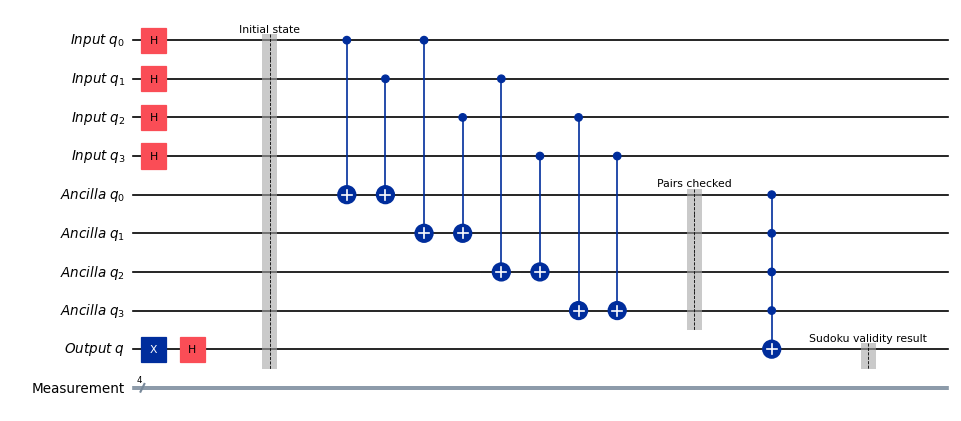

In [ ]:
# Now, we will check that all of them are 0, this would mean that all pairs are different
sudoku_qc.barrier(ancilla_q, label="Pairs checked")

sudoku_qc.mcx(ancilla_q, output_q)
sudoku_qc.barrier(output_q, label="Sudoku validity result")

sudoku_qc.draw('mpl', scale=0.6, fold=-1)


### 1.4 Uncompute the ancilla qubits

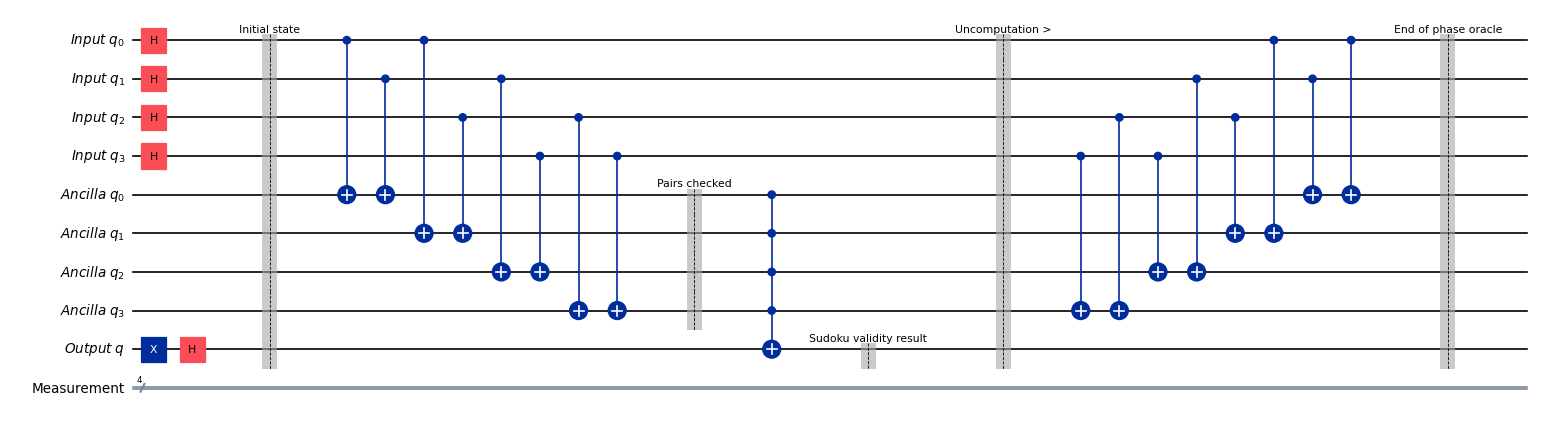

In [ ]:
# Now we need to uncompute (undo our previous operations) so that the phase kickback gets propagated.

# We will just reverse the order of the operations we did before
sudoku_qc.barrier(label="Uncomputation >")

# Uncompute q2 and q3
sudoku_qc.cx(input_q[3], ancilla_q[3])
sudoku_qc.cx(input_q[2], ancilla_q[3])

# Uncompute q1 and q3
sudoku_qc.cx(input_q[3], ancilla_q[2])
sudoku_qc.cx(input_q[1], ancilla_q[2])

# Uncompute q0 and q2
sudoku_qc.cx(input_q[2], ancilla_q[1])
sudoku_qc.cx(input_q[0], ancilla_q[1])

# Uncompute q0 and q1
sudoku_qc.cx(input_q[1], ancilla_q[0])
sudoku_qc.cx(input_q[0], ancilla_q[0])

sudoku_qc.barrier(label="End of phase oracle")
sudoku_qc.draw('mpl', scale=0.6, fold=-1)


In [ ]:
# Done!

### 1.5 Create a difussion operation

To simplify creating a multiple controlled Z, use the `.mcrz` gate (https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#mcrz)

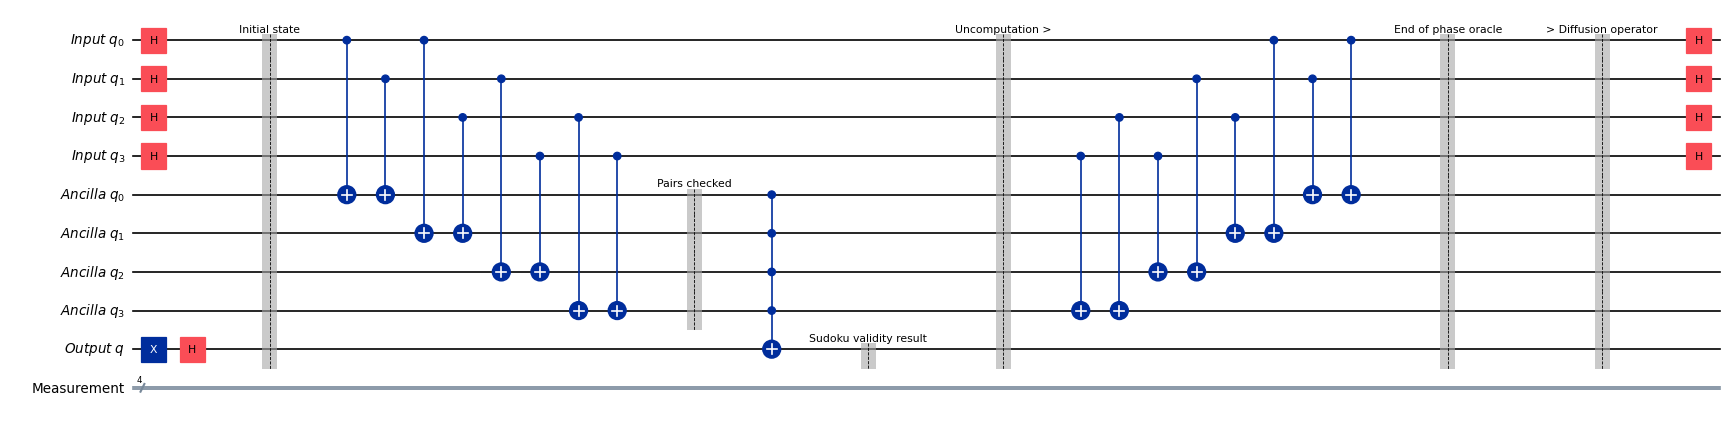

In [ ]:
# In order to do the diffusion operator (a rotation over |s>) we can just go to a basis where |s> is |0..0> and apply a rotation over |0..0>.
# A rotation over |0..0> is just a phase flip of all all of the states not equal to |0..0>.
# If you remember from the previous notebook, we could just flip the phase of |0000> to change the relative phase of every other state.
# We will do just that here.

## The first step, is to apply a Hadamard gate to all of the qubits, in order to change the basis.
sudoku_qc.barrier(label="> Diffusion operator")
sudoku_qc.h(input_q)
sudoku_qc.draw('mpl', scale=0.6, fold=-1)


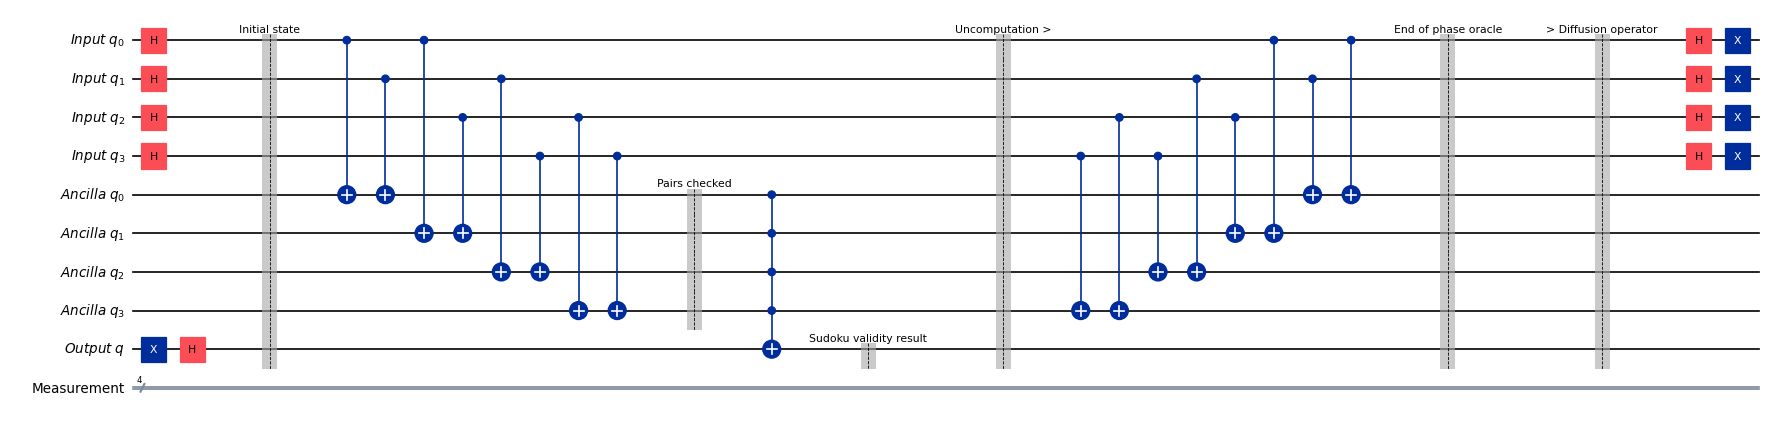

In [ ]:
# Now, We knew that we had a gate that changed the phase just of the state |1111> (CCCZ)
# So we can change |0000> to |1111>, change the phase of |1111> and then change it back to |0000>.

# In order to change |0000> to |1111>, we can just apply X gates to all of the qubits.
sudoku_qc.x(input_q)
sudoku_qc.draw('mpl', scale=0.6, fold=-1)

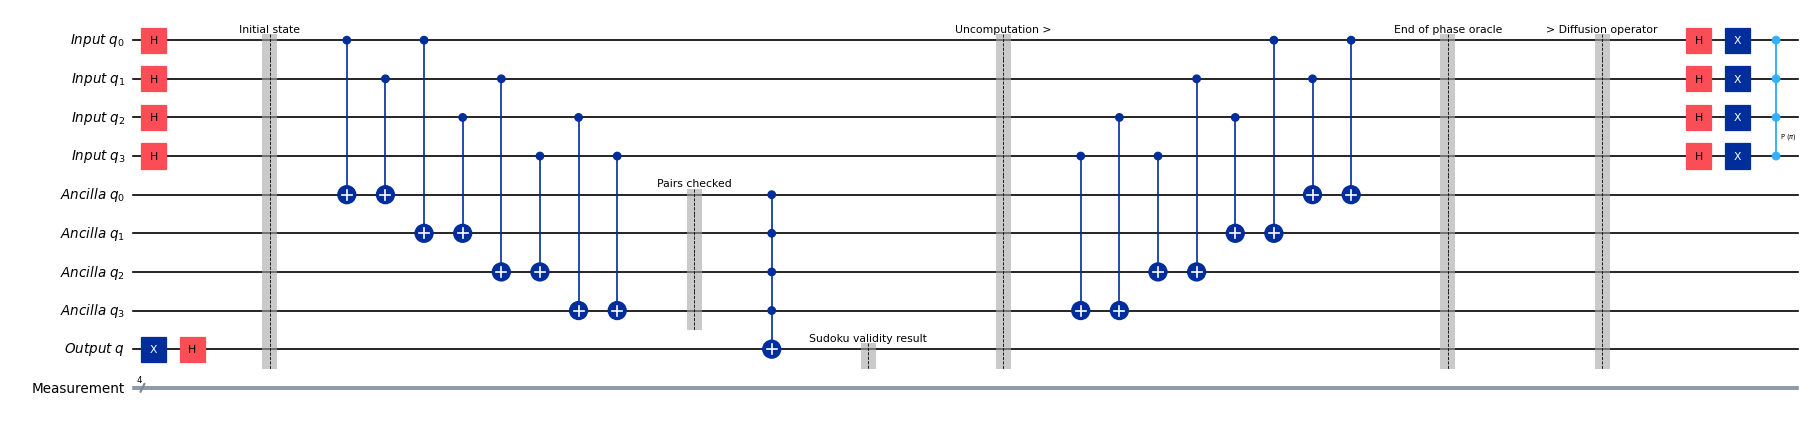

In [ ]:
# We now have |1111> and we can apply the CCCZ gate, or an equivalent to it.
# Checking the documentation, we have the following generalized multiple controlled gates:
# mcp()	PhaseGate
# mcrx()	RXGate
# mcry()	RYGate
# mcrz()	RZGate
# mcx()	    XGate

# As we want to change the phase, we could either use mcrz or mcp.
# We will use mcp.
# First we need to know the angle we want to apply. If its half a rotation, then we will apply pi.
from math import pi
sudoku_qc.mcp(pi, [input_q[0], input_q[1], input_q[2]], input_q[3]) # It doesn't really matter which one we use as the target, as they are all the same.

sudoku_qc.draw('mpl', scale=0.6, fold=-1)

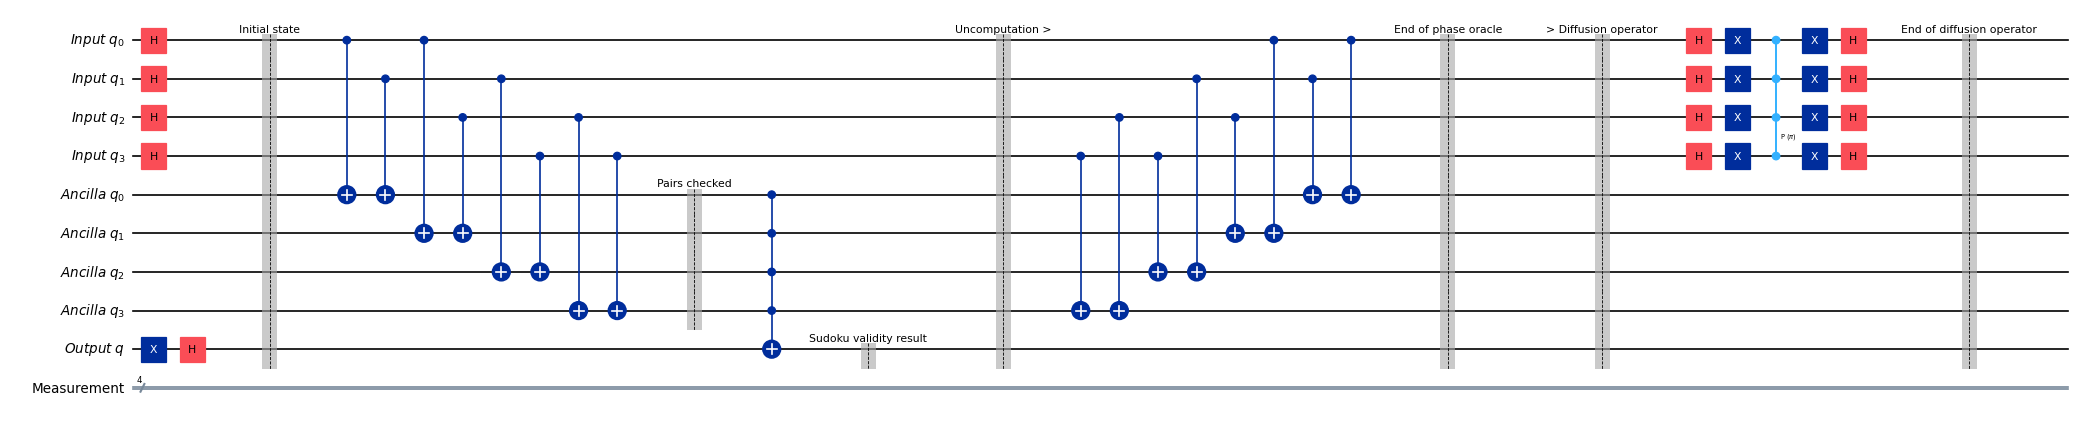

In [ ]:
# Finally, we need to change |1111> back to |0000>, which is just applying X gates again.
sudoku_qc.x(input_q)

# And change the basis back to the original one, by applying Hadamard gates again.
sudoku_qc.h(input_q)
sudoku_qc.barrier(label="End of diffusion operator")

sudoku_qc.draw('mpl', scale=0.6, fold=-1)

In [ ]:
# We are done! This is a single iteration of the Grover's algorithm.

# Now... this will just boost the probability of the correct solutions to appear, but maybe not enough.
# Let's run it now to see what we get.



In [ ]:
# In order to run it we need to add the measurement gates to the circuit.
# So that we do not disturb our original, we will create a copy
sudoku_qc_copy = sudoku_qc.copy()

sudoku_qc_copy.measure(input_q, output_bits)

In [ ]:
# Now we run it
from qiskit_ibm_runtime import Sampler
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Again, the order is Create Backend > Transpile > Run
backend = FakeGuadalupeV2()
transpiler = generate_preset_pass_manager(backend)
sampler = Sampler(backend)

# Now we transpile the circuit and run it
transpiled_circuit = transpiler.run(sudoku_qc_copy)
job = sampler.run([transpiled_circuit], shots=1024)

/home/user/Sync/Repositories/quantum/UFV-2025/.venv/lib64/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [ ]:
counts = job.result()[0].data.Measurement.get_counts()
counts

{'0110': 420,
 '1001': 371,
 '0100': 23,
 '1110': 17,
 '0101': 13,
 '1011': 10,
 '0000': 16,
 '0010': 24,
 '0111': 28,
 '1101': 11,
 '1000': 21,
 '1010': 19,
 '1100': 10,
 '0011': 16,
 '0001': 12,
 '1111': 13}

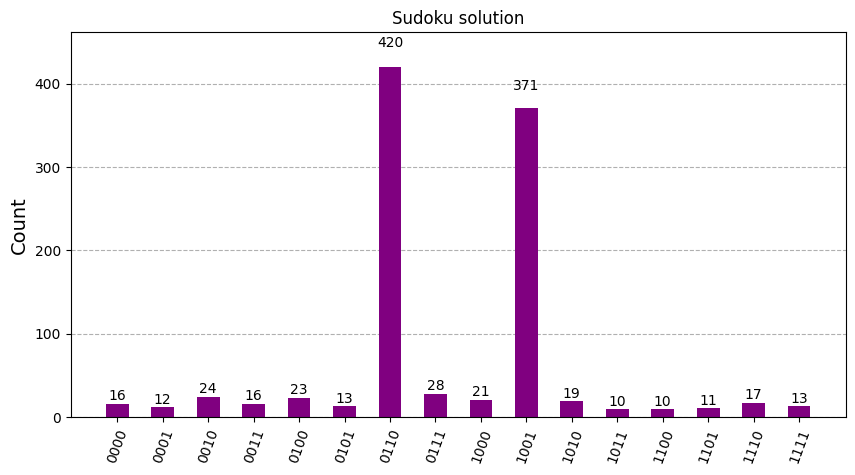

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts, title="Sudoku solution", color='purple', figsize=(10, 5))

In [ ]:
# Pretty good results already! Let's see if we can get even better results by doing the iteration multiple times.

### 1.6 Repeat the previous steps as necesary

Again, we had to run the Grover Iteration roughly sqrt(N).

In our case we have 4 qubits, so we should repeat the iteration 2 times.

In [ ]:
# Let's create a function that will apply the phase oracle:

def apply_phase_oracle(qc: QuantumCircuit):
    qc.barrier(label="Phase oracle")
    # Check that q0 and q1 are different
    qc.cx(input_q[0], ancilla_q[0])
    qc.cx(input_q[1], ancilla_q[0])

    # Check that q0 and q2 are different
    qc.cx(input_q[0], ancilla_q[1])
    qc.cx(input_q[2], ancilla_q[1])

    # Check that q1 and q3 are different
    qc.cx(input_q[1], ancilla_q[2])
    qc.cx(input_q[3], ancilla_q[2])

    # Check that q2 and q3 are different
    qc.cx(input_q[2], ancilla_q[3])
    qc.cx(input_q[3], ancilla_q[3])

    qc.mcx(ancilla_q, output_q)

    # Uncompute q2 and q3
    qc.cx(input_q[3], ancilla_q[3])
    qc.cx(input_q[2], ancilla_q[3])

    # Uncompute q1 and q3
    qc.cx(input_q[3], ancilla_q[2])
    qc.cx(input_q[1], ancilla_q[2])

    # Uncompute q0 and q2
    qc.cx(input_q[2], ancilla_q[1])
    qc.cx(input_q[0], ancilla_q[1])

    # Uncompute q0 and q1
    qc.cx(input_q[1], ancilla_q[0])
    qc.cx(input_q[0], ancilla_q[0])

In [ ]:
# And now a function that will apply the diffusion operator:
def apply_diffusion_operator(qc: QuantumCircuit):
    qc.barrier(label="Diffusion operator")
    qc.h(input_q)
    qc.x(input_q)
    qc.mcp(pi, [input_q[0], input_q[1], input_q[2]], input_q[3])
    qc.x(input_q)
    qc.h(input_q)

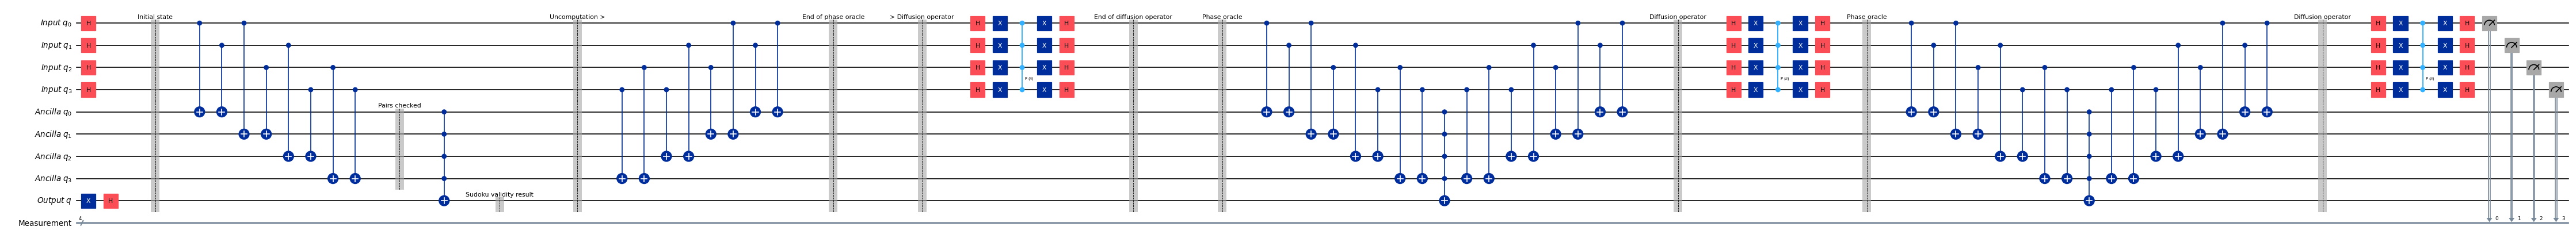

In [ ]:
# Given our sudoku_qc, let's add two more iteations with these functions

for iteration in range(2):
    apply_phase_oracle(sudoku_qc)
    apply_diffusion_operator(sudoku_qc)

# Let's see the end result
sudoku_qc.measure(input_q, output_bits)

sudoku_qc.draw('mpl', scale=0.6, fold=-1)

### 1.7 Transpile our circuit
Our quantum computer only understands a subset of quantum gates, we need to convert our complicated circuit, into a set of quantum gates our QC understands.

We do so transpiling our circuit (https://docs.quantum.ibm.com/transpile)

In [ ]:
# We already have the needed backend, transpiler and sampler from before, so it's just a matter of running it again
transpiled_circuit = transpiler.run(sudoku_qc)

### 1.8 Run our circuit in a QiskitRuntime Sampler

In [ ]:
# Now we run our transpiled circuit
job = sampler.run([transpiled_circuit], shots=1024)

/home/user/Sync/Repositories/quantum/UFV-2025/.venv/lib64/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [ ]:
counts = job.result()[0].data.Measurement.get_counts()
counts

{'0111': 44,
 '1011': 43,
 '0100': 55,
 '1101': 44,
 '1010': 52,
 '1001': 165,
 '1100': 33,
 '0110': 161,
 '0101': 60,
 '0010': 57,
 '0001': 54,
 '1110': 48,
 '1000': 44,
 '0011': 45,
 '0000': 61,
 '1111': 58}

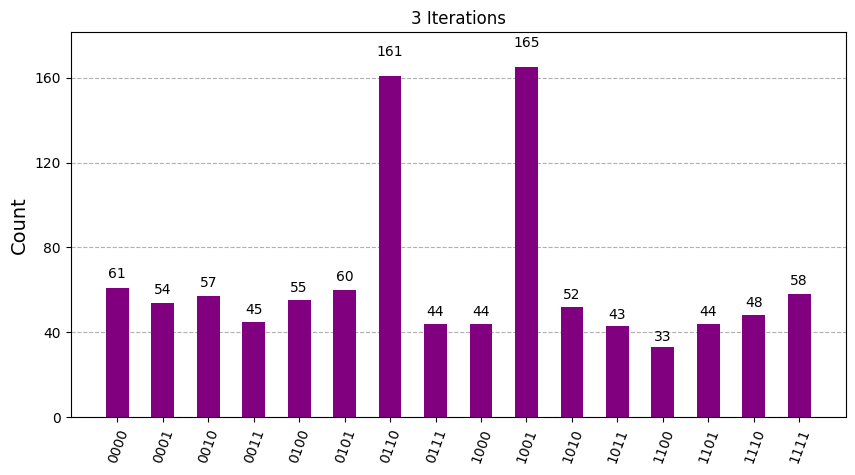

In [ ]:
plot_histogram(counts, title="3 Iterations", color='purple', figsize=(10, 5))

In [ ]:
# Maybe we did not need so many iterations after all...

## 2 - Implement the party problem - HOMEWORK

In class we saw a problem whose solution checker could be expressed with the following expression:

`~(Alice & Bob)   &    (Alice & Charlie)    |    (Bob & Charlie)`

Read the documentation and use the PhaseOracle object from qiskit to implement a grover circuit and run it in a simulator.

https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.PhaseOracle

In [ ]:
# Apparently tweedledum is broken and completely dead.
# https://github.com/Qiskit/qiskit/issues/12589

# So we will just skip this, but here you have the code from someone that managed to make it work

## Inicialización

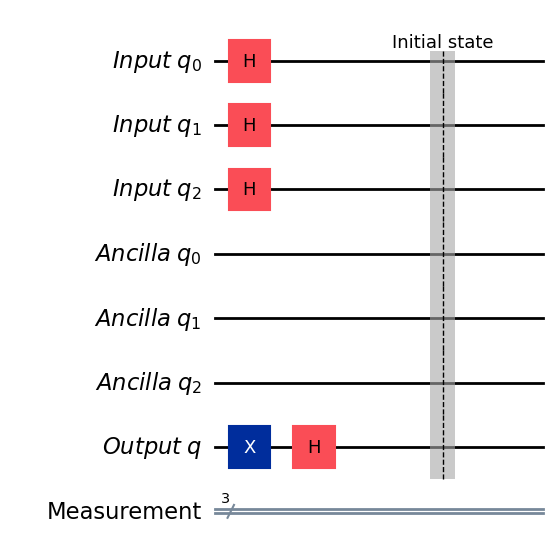

In [ ]:
#inicializacion del circuito y creacion del estado de superposicion s
input_q = QuantumRegister(3, name="Input q")
ancilla_q = QuantumRegister(3, name="Ancilla q")
output_q = QuantumRegister(1, name="Output q")

output_bits = ClassicalRegister(3, name="Measurement")

pp_qc = QuantumCircuit(input_q, ancilla_q, output_q, output_bits) #Party problem quantum circuit

# superposition
pp_qc.h(input_q)

# Output prepared for Phase Kickback
pp_qc.x(output_q)
pp_qc.h(output_q)
pp_qc.barrier(label="Initial state")

pp_qc.draw('mpl')

##Oráculo

Creamos el oráculo como puerta

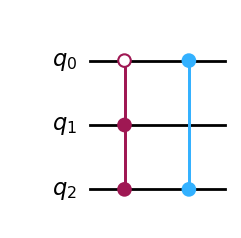

In [ ]:
from qiskit.circuit.library import PhaseOracle

oraculo = PhaseOracle(
    expression="((~(a & b)) & (a & c)) | (b & c)",
    var_order=['a', 'b', 'c']  # Orden de creación de qubits
)

#bloque
oraculo.to_gate()
oraculo_controlado = oraculo.control()

oraculo.draw('mpl')

## Difusión

Creamos el circuito de difusion como puerta

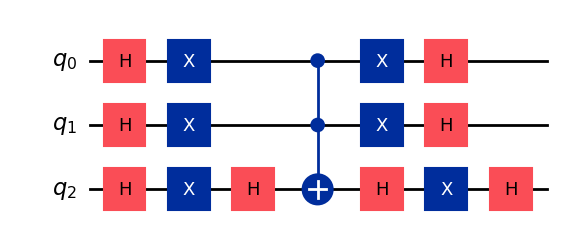

In [ ]:
difussion_qc = QuantumCircuit(3, name = 'Difussion')
difussion_qc.h([0,1,2])
difussion_qc.x([0,1,2])
# difussion_qc.barrier()
difussion_qc.h(2)
difussion_qc.mcx([0, 1], 2)
difussion_qc.h(2)
# difussion_qc.barrier()
difussion_qc.x([0,1,2])
difussion_qc.h([0,1,2])

#bloque
difussion_qc.to_gate()
difussion_controlado = difussion_qc.control()

difussion_qc.draw('mpl')
# se han quitado las barreras porque impiden la transformacion de las intrucciones en bloque

## ORACULO + DIFUSOR

Lo aplicamos al circuito tantas veces como $\sqrt(N)$

In [ ]:
import numpy as np
N = 2**3
raiz = np.sqrt(N)
print(f"Debemos hacer {raiz} iteraciones. Redondeando {round(raiz)} iteraciones")

Debemos hacer 2.8284271247461903 iteraciones. Redondeando 3 iteraciones


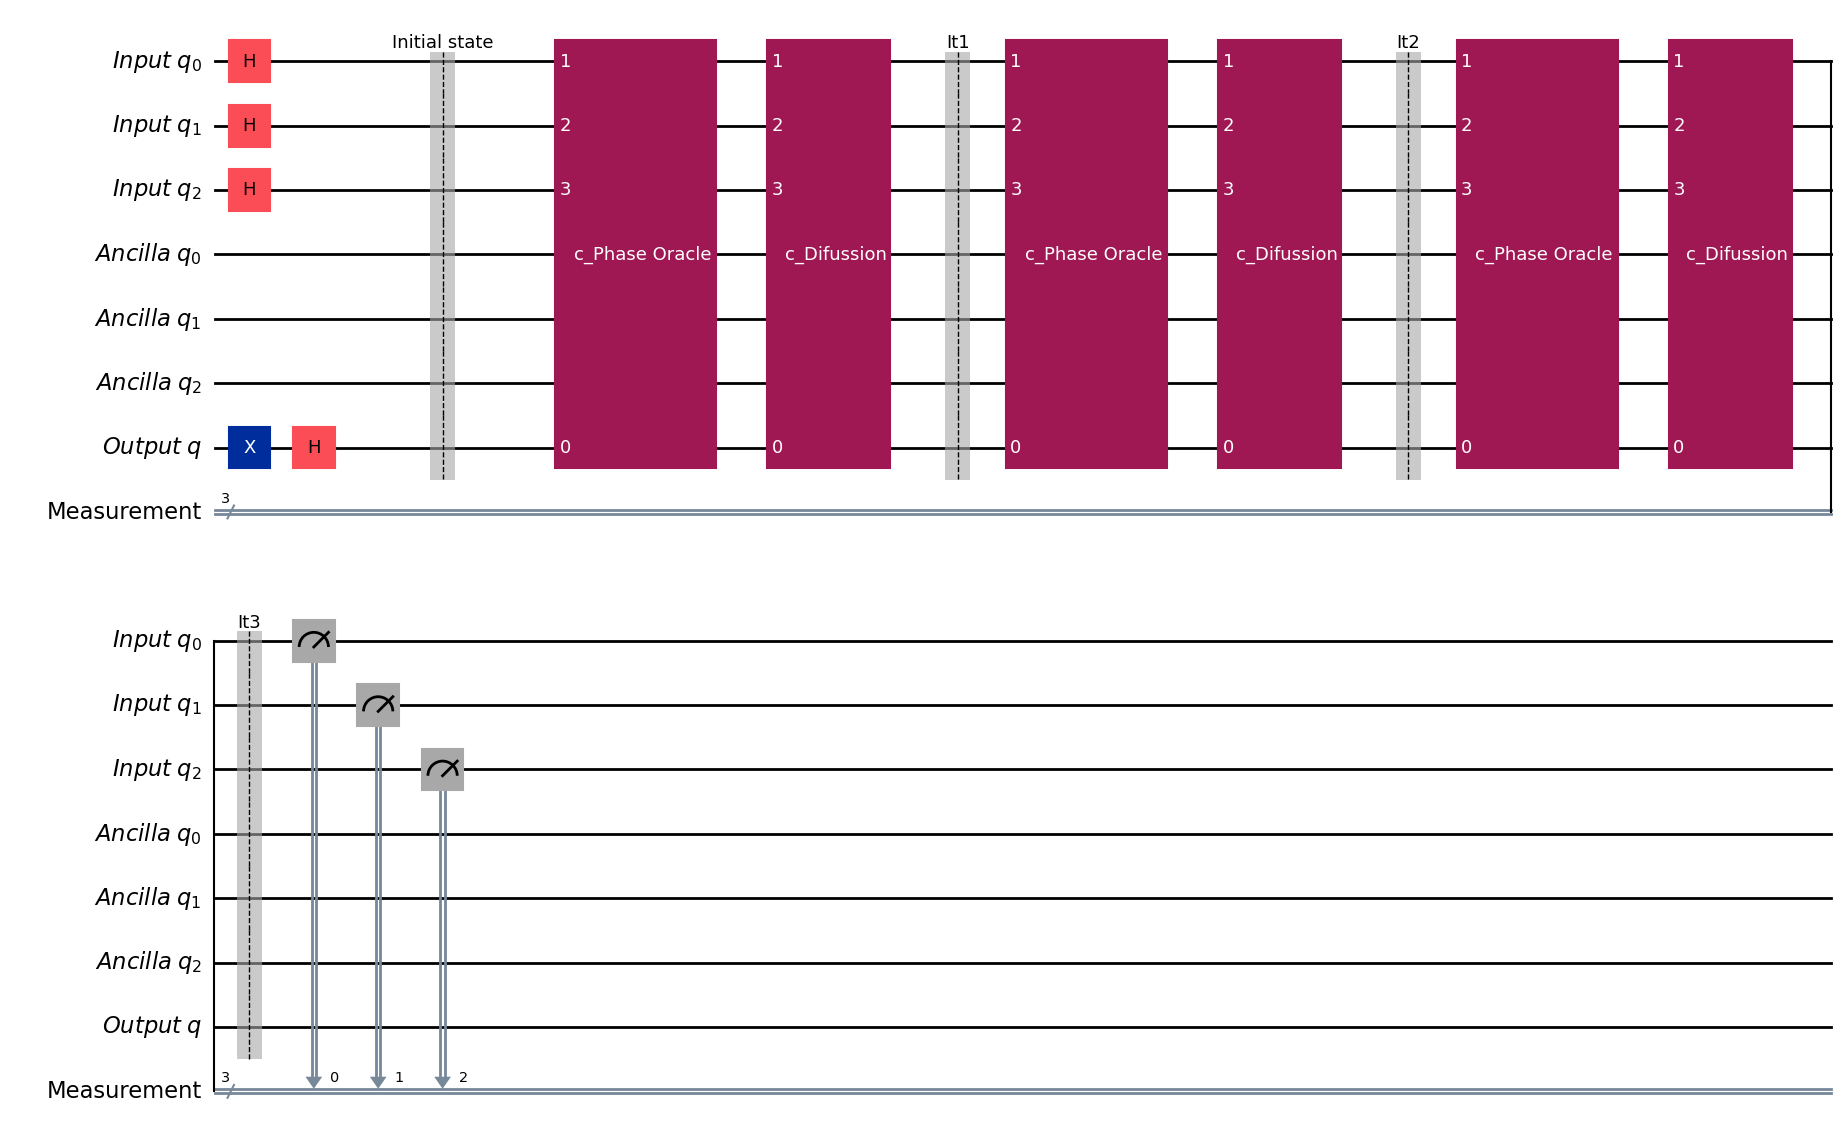

In [ ]:
# oráculo controlado 3 veces con difusor al final de cada uno
pp_qc.append(oraculo_controlado, [output_q[0]] + list(input_q))
pp_qc.append(difussion_controlado, [output_q[0]] + list(input_q))
pp_qc.barrier(label = "It1")

pp_qc.append(oraculo_controlado, [output_q[0]] + list(input_q))
pp_qc.append(difussion_controlado, [output_q[0]] + list(input_q))
pp_qc.barrier(label = "It2")

pp_qc.append(oraculo_controlado, [output_q[0]] + list(input_q))
pp_qc.append(difussion_controlado, [output_q[0]] + list(input_q))
pp_qc.barrier(label = "It3")


pp_qc.measure(input_q, output_bits) # medimos los tres qubits iniciales
pp_qc.draw('mpl')

## Transpilamos y simulación

In [ ]:
#traspilacion
isa_pp_qc = pm.run(pp_qc)
job2 = sampler.run([isa_pp_qc], shots= 10000)
job2
job2.status()

<JobStatus.RUNNING: 'job is actively running'>

In [ ]:
pub_result2 = job2.result()[0]
print(pub_result2)
job2.result()
print(f"{pub_result2.data.Measurement.get_counts()}")

SamplerPubResult(data=DataBin(Measurement=BitArray(<shape=(), num_shots=10000, num_bits=3>)), metadata={'shots': 10000, 'circuit_metadata': {}})
{'010': 642, '100': 622, '111': 2290, '101': 2295, '110': 2261, '011': 685, '001': 593, '000': 612}


## Histograma

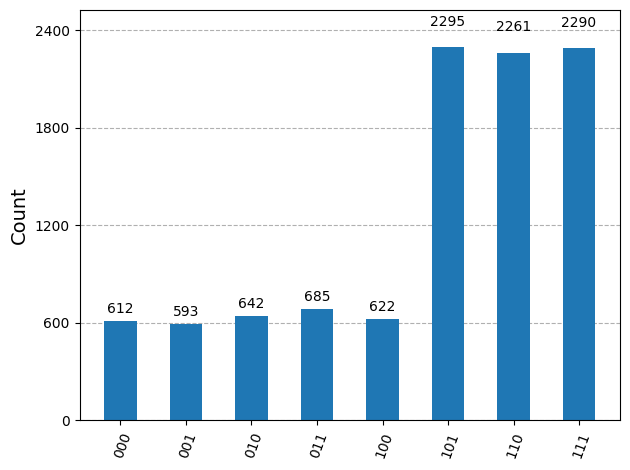

In [ ]:
plot_histogram(pub_result2.data.Measurement.get_counts())

Interpretando los bits como [Charlie, Bob, Alice] (ya que aparecen al reves en cuántica), podemos verificar que los estados con probabilidad más alta satisfacen la expresión inicial:

- Estado 101(Charlie=1, Bob=0, Alice=1) :

~(Alice & Bob) = ~(1 & 0) = 1

(Alice & Charlie) = (1 & 1) = 1

(Bob & Charlie) = (0 & 1) = 0

Evaluación: (1 & 1) | 0 = 1

- Estado 110(Charlie=1, Bob=1, Alice=0) :

~(Alice & Bob) = ~(0 & 1) = 1

(Alice & Charlie) = (0 & 1) = 0

(Bob & Charlie) = (1 & 1) = 1

Evaluación: (1 & 0) | 1 = 1

- Estado 111(Charlie=1, Bob=1, Alice=1) :

~(Alice & Bob) = ~(1 & 1) = 0

(Alice & Charlie) = (1 & 1) = 1

(Bob & Charlie) = (1 & 1) = 1

Evaluación: (0 & 1) | 1 = 1


Se ve que todas la verifican por lo que el algoritmo de Grover ha identificado correctamente los estados mencionados como soluciones al problema. En el contexto del problema de asistentes a la fiesta con alta probabilidad ocurrira alguno de los siguientes escenarios:

101: Charlie y Alice presentes, Bob ausente.

110: Charlie y Bob presentes, Alice ausente.

111: Todos presentes.

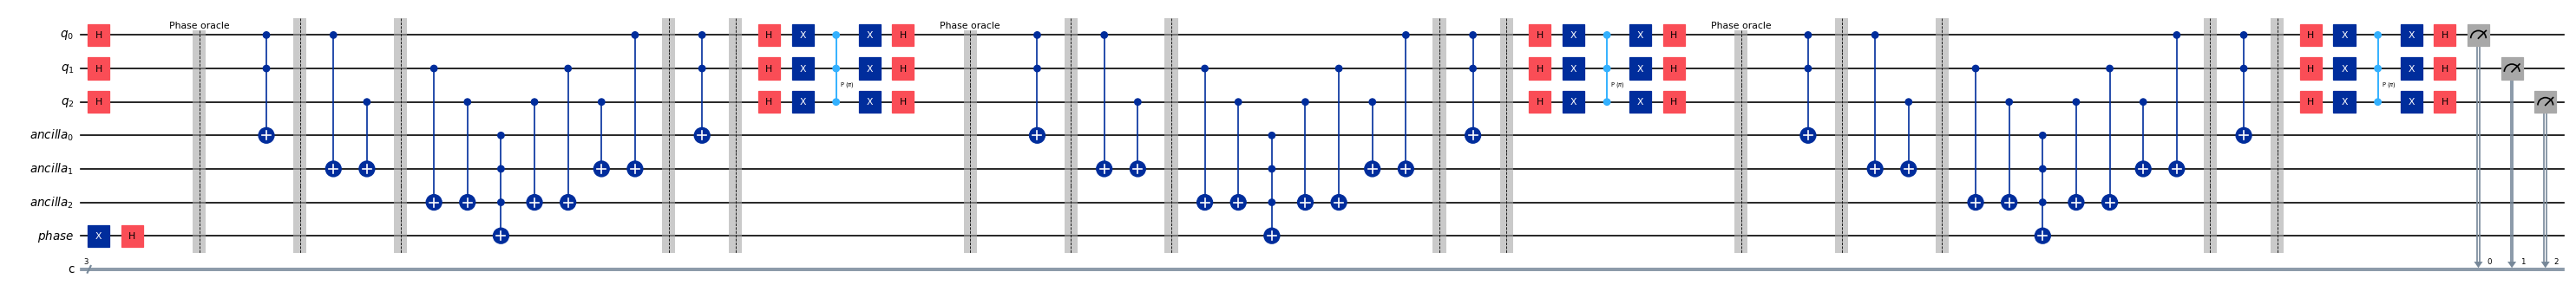

In [34]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from math import pi

# Crear registros
q = QuantumRegister(3, name='q')
ancilla=QuantumRegister(3,name='ancilla') # q[0]=Alice, q[1]=Bob, q[2]=Charlie, q[3-8]=ancillas
phase=QuantumRegister(1,name='phase')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(q,ancilla,phase, c)

# A = q[0], B = q[1], C = q[2]
# ancillas:
# q[3] = A and B
# q[4] = A and C
# q[6] = (¬(A and B)) and (A and C)
# q[7] = B and C
# q[8] = salida final (resultado del OR)

# Paso 1: A ∧ B → q[3]
qc.h([0,1,2])
qc.x(phase[0])
qc.h(phase[0])



def apply_phase_oracle(qc: QuantumCircuit):
    qc.barrier(label="Phase oracle")
    # Check that q0 and q1 are different
    #qc.x(0)
    #qc.x(1)
    qc.ccx(q[0], q[1],ancilla[0])
    #qc.cx(q[1], q[4])
    # Paso 2: ¬(A ∧ B) → X(q[3])
    qc.barrier()


    # Paso 3: A ∧ C → q[4]
    qc.cx(q[0], ancilla[1])

    # Paso 4: ¬(A∧B) ∧ (A∧C) → q[6]
    qc.cx(q[2], ancilla[1])
    qc.barrier()

    # Paso 5: B ∧ C → q[7]
    qc.cx(q[1], ancilla[2])

    # Paso 6: OR final → q[8] = q[6] ∨ q[7]
    qc.cx(q[2], ancilla[2])
    #qc.cx(q[7], q[8])
    qc.mcx([ancilla[0],ancilla[1], ancilla[2]], phase[0])
    # Paso 6: OR final → q[8] = q[6] ∨ q[7]
    qc.cx(q[2], ancilla[2])
    qc.cx(q[1], ancilla[2])
    qc.cx(q[2], ancilla[1])
    qc.cx(q[0], ancilla[1])
    #qc.cx(q[1], q[4])
    qc.barrier()
    qc.ccx(q[0], q[1],ancilla[0])
    #qc.x(1)
    #qc.x(0)


def apply_diffusion_operator(qc: QuantumCircuit):
    #qc.barrier(label="Diffusion operator")
      qc.h(q)
      qc.x(q)
      qc.mcp(pi, [q[0], q[1]], q[2])
      qc.x(q)
      qc.h(q)

for iteration in range(3):
    apply_phase_oracle(qc)
    qc.barrier()
    apply_diffusion_operator(qc)

# Let's see the end result
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw('mpl', scale=0.6, fold=-1)

SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1000, num_bits=3>)), metadata={'shots': 1000, 'circuit_metadata': {}})


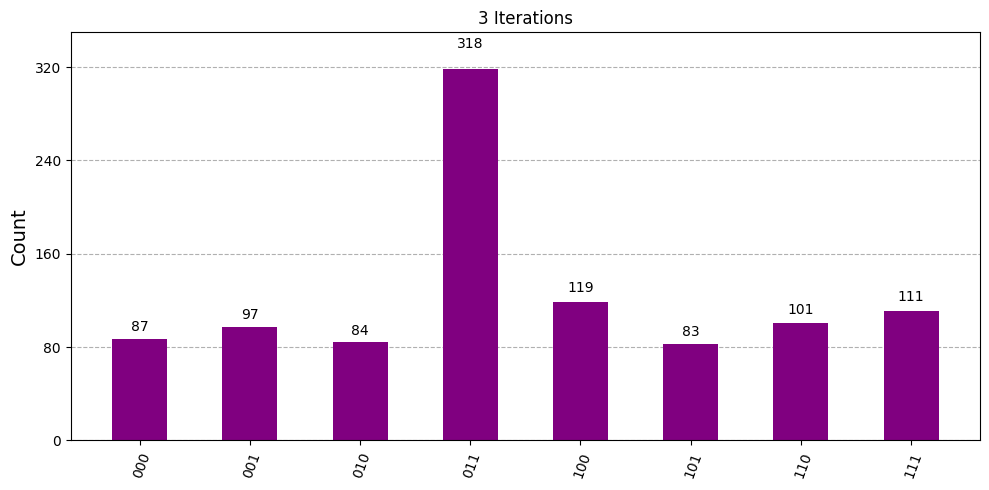

In [35]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeMelbourneV2  #procesador cuantico
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

fake_manila = FakeMelbourneV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)

#SIMULACIÓN PARA EL CIRCUITO QC

isa_qc = pm.run(qc)

sampler = Sampler(mode=fake_manila)

job = sampler.run([isa_qc], shots=1000) #shots: cantidad de veces q lanzamos el circuito

# Lets see if the job has finished
job.status()

# Lets get the results
pub_result = job.result()[0]
print(pub_result)

pub_result.data.c.get_counts()
counts = job.result()[0].data.c.get_counts()
counts
plot_histogram(counts, title="3 Iterations", color='purple', figsize=(10, 5))
